# "Predicción de la diferencia de goles y análisis de la ventaja de localía en partidos internacionales de fútbol"
Ciencia de Datos

Profesor: JESUS ANTONIO VILLARRAGA PALOMINO

Integrantes:

Karol Andrea Daza Rojas

Cristian Camilo Berbeo Villalobos

Daniel Felipe Fonseca Cabezas

# "Resumen"
Este cuadernillo documenta el análisis exploratorio, la limpieza y la preparación de datos, la ingeniería de variables, la construcción y evaluación de un modelo de regresión para predecir la diferencia de goles (goal_diff = home_score - away_score) y el análisis de la ventaja de localía usando la base de datos International Football Results (1872–2023) (archivo results.csv). Se incluyen las decisiones de modelado, gráficos y conclusiones.

## "Descripción de la base de datos"
Nombre del archivo: results.csv

Fuente: Conjunto público clásico que registra resultados internacionales desde 1872 hasta 2023 (Kaggle). 

El archivo previsto contiene registros de partidos con las siguientes columnas principales:

### Datos  y Descripcion

|date:        Fecha del partido (YYYY-MM-DD)|

|  home_team: Equipo local                 |

|  away_team: Equipo visitante               |

| home_score: Goles del equipo local            |

| away_score: Goles del equipo visitante          |

| tournament: Tipo de competencia (Friendly, World Cup, etc.)|

|    city: Ciudad donde se jugó             |

|   country: País donde se jugó              |

|   neutral: Booleano que indica si fue en cancha neutral  |


- El dataset es amplio y abarca más de 48.000 partidos.

- Algunas inconsistencias posibles: variaciones en el nombre de torneos, nombres de equipos, y fechas antiguas. Se realizará limpieza y normalización.

## Objetivo General
evaluar un modelo de regresión que prediga la diferencia de goles (goal_diff) en partidos internacionales y cuantifique el efecto de la localía.
### Objetivos Especificos
1. Generar variables derivadas (ingeniería de features) relevantes para la predicción.
2. Entrenar un modelo de regresión (lineal y comparativo con otros) y evaluar su desempeño.
3. Analizar residuales y extraer conclusiones deportivas y estadísticas.

### Importar librerias ###

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Carga de la base de Datos ###

In [4]:
DATA_PATH = '../data/results.csv'


df = pd.read_csv(DATA_PATH)

df['date'] = pd.to_datetime(df['date'], errors='coerce')

df = df.dropna(subset=['date']).sort_values('date').reset_index(drop=True)


print('Dimensiones:', df.shape)
df.columns.tolist()


# Mostrar primeras filas
df.head()

Dimensiones: (48673, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
#tipos de datos
df.dtypes


date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [6]:
#Datos duplicados
df.duplicated().sum()

np.int64(0)

In [7]:
#datos unicos
df.nunique()


date          16357
home_team       325
away_team       318
home_score       26
away_score       22
tournament      188
city           2119
country         268
neutral           2
dtype: int64

### Informacion de la Base de Datos

In [8]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48673 entries, 0 to 48672
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        48673 non-null  datetime64[ns]
 1   home_team   48673 non-null  object        
 2   away_team   48673 non-null  object        
 3   home_score  48673 non-null  int64         
 4   away_score  48673 non-null  int64         
 5   tournament  48673 non-null  object        
 6   city        48673 non-null  object        
 7   country     48673 non-null  object        
 8   neutral     48673 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 3.0+ MB


### Resumen Estadistico

In [9]:
df.describe()


,date,home_score,away_score
count,48673,48673.000000,48673.000000
mean,1993-11-20 00:23:08.137160192,1.757874,1.181743
min,1872-11-30 00:00:00,0.000000,0.000000
25%,1980-03-22 00:00:00,1.000000,0.000000
50%,2000-04-02 00:00:00,1.000000,1.000000
75%,2012-12-03 00:00:00,2.000000,2.000000
max,2025-10-14 00:00:00,31.000000,21.000000
std,NaN,1.772685,1.401651


In [10]:
#Variables Categoricas
df.describe(include='object')



,home_team,away_team,tournament,city,country
count,48673,48673,48673,48673,48673
unique,325,318,188,2119,268
top,Brazil,Uruguay,Friendly,Kuala Lumpur,United States
freq,608,579,18151,737,1464


In [11]:
#variables Numericas
df.describe(include='number')

,home_score,away_score
count,48673.000000,48673.000000
mean,1.757874,1.181743
std,1.772685,1.401651
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


### Valores nulos

In [12]:
df.isnull().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

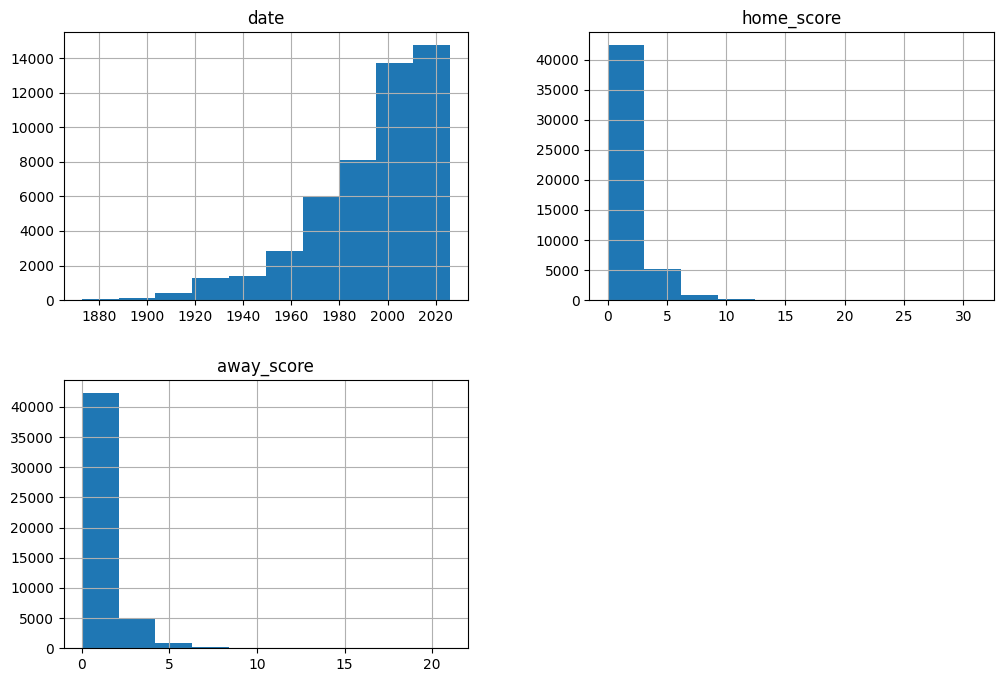

In [13]:
#distribución de una variable numérica
df.hist(figsize=(12,8))
plt.show()


In [27]:
df["home_team"].value_counts()

home_team
Brazil              608
Argentina           599
Mexico              594
Germany             551
South Korea         547
                   ... 
Elba Island           1
West Papua            1
Ticino                1
Hmong                 1
Marshall Islands      1
Name: count, Length: 325, dtype: int64

In [26]:
df["away_team"].value_counts()

away_team
Uruguay             579
Sweden              564
England             539
Hungary             506
Paraguay            491
                   ... 
Barawa                1
Biafra                1
Aymara                1
Ticino                1
Marshall Islands      1
Name: count, Length: 318, dtype: int64

In [24]:
df["tournament"].value_counts()

tournament
Friendly                                18151
FIFA World Cup qualification             8635
UEFA Euro qualification                  2824
African Cup of Nations qualification     2278
FIFA World Cup                            964
                                        ...  
TIFOCO Tournament                           1
Copa Confraternidad                         1
ConIFA Challenger Cup                       1
Benedikt Fontana Cup                        1
South Asian Super Cup                       1
Name: count, Length: 188, dtype: int64

In [23]:
df["city"].value_counts()

city
Kuala Lumpur    737
Bangkok         579
Doha            552
London          441
Budapest        433
               ... 
Okayama           1
Taranto           1
Bejaia            1
Al Hoceima        1
Sumqayit          1
Name: count, Length: 2119, dtype: int64

In [ ]:
df["country"].value_counts()

country
United States          1464
France                  910
Malaysia                828
England                 759
Thailand                720
                       ... 
Mayotte                   2
Bohemia and Moravia       2
Yemen DPR                 2
Greenland                 2
Micronesia                1
Name: count, Length: 268, dtype: int64

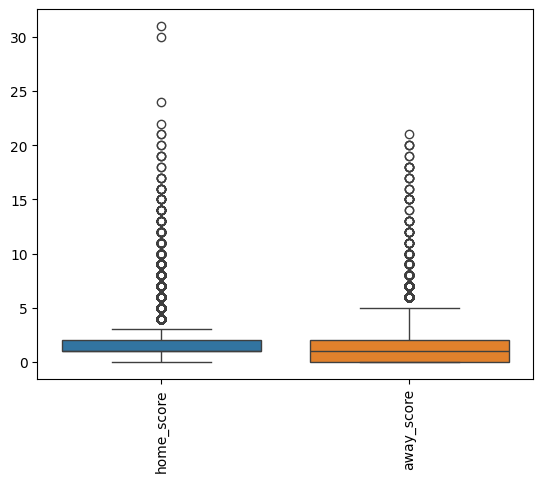

In [17]:
#detección de datos atipicos
sns.boxplot(data=df.select_dtypes(include=np.number))
plt.xticks(rotation=90)
plt.show()


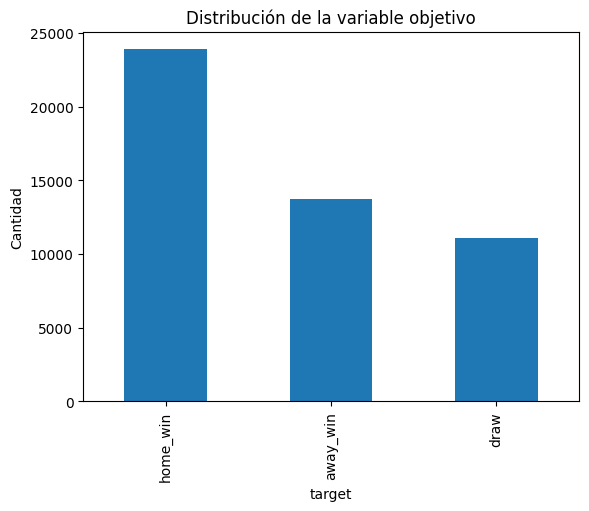

In [18]:
# balance de clases
# Crear la columna 'target' si no existe: diferencia de goles y etiqueta categórica (home_win, draw, away_win)
if 'target' not in df.columns:
	df['goal_diff'] = df['home_score'] - df['away_score']
	df['target'] = df['goal_diff'].apply(lambda x: 'home_win' if x > 0 else ('draw' if x == 0 else 'away_win'))

df['target'].value_counts().plot(kind='bar')
plt.title("Distribución de la variable objetivo")
plt.xlabel("target")
plt.ylabel("Cantidad")
plt.show()


### Distribucion de los goles

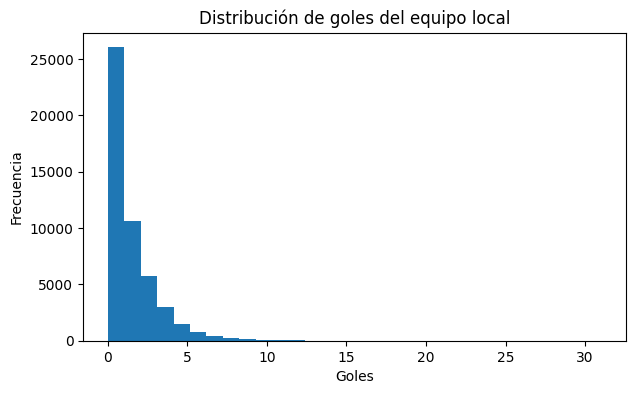

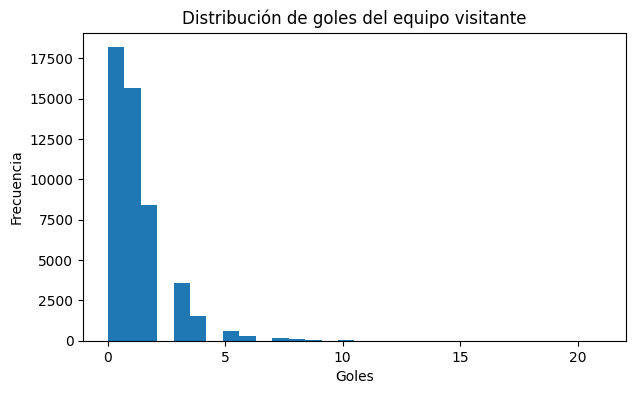

Text(0.5, 1.0, 'Boxplot de goles del equipo local')

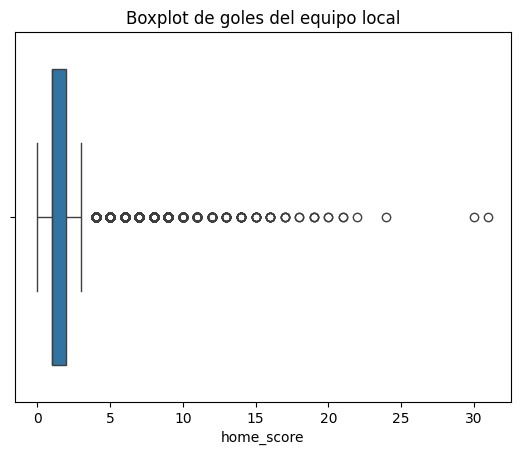

In [19]:
plt.figure(figsize=(7,4))
plt.hist(df['home_score'], bins=30)
plt.title("Distribución de goles del equipo local")
plt.xlabel("Goles")
plt.ylabel("Frecuencia")
plt.show()

plt.figure(figsize=(7,4))
plt.hist(df['away_score'], bins=30)
plt.title("Distribución de goles del equipo visitante")
plt.xlabel("Goles")
plt.ylabel("Frecuencia")
plt.show()
sns.boxplot(x='home_score', data=df)
plt.title("Boxplot de goles del equipo local")

### Cantidad de Goles por año

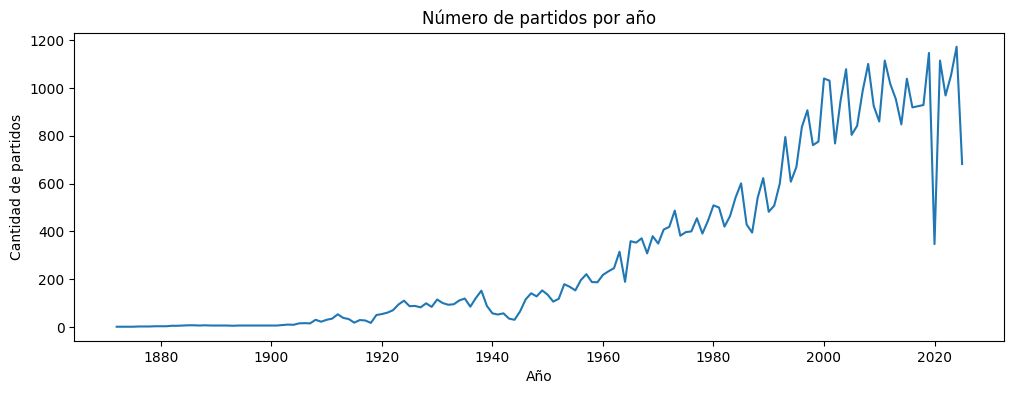

In [20]:
df['year'] = df['date'].dt.year

plt.figure(figsize=(12,4))
df['year'].value_counts().sort_index().plot(kind='line')
plt.title("Número de partidos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de partidos")
plt.show()


### Análisis Exploratorio Inicial

A partir del análisis preliminar de la base de datos pudimos identificar lo siguiente:

- El archivo contiene partidos desde el año 1872 hasta 2023 lo cual significa que teniemos una informacion extensa para el estudio
- Las columnas principales incluyen equipos, goles, ciudad, país y tipo de torneo
- Algunas columnas presentan valores nulos, principalmente en city y country, lo cual se podria esperara debido a que son datos con una gran variedad de antiguedad
- La distribución de goles muestra que la mayoría de partidos tienen entre 0 y 3 goles por equipo
- Se observa un crecimiento significativo en el número de partidos por año, reflejando la expansión del fútbol internacional
- El campo neutral requiere verificación para estandarizarlo (puede venir como booleano o string)
